#Data upload

In [0]:
#import starting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#upload via url from personal github
data_url = 'https://raw.githubusercontent.com/lopez-isaac/project-data-sets/master/Firearm%20Murders.csv'
Main_data = pd.read_csv('https://raw.githubusercontent.com/lopez-isaac/project-data-sets/master/Firearm%20Murders.csv')
Main_data.head()

,Year,State,Total,Total minus Unknown,Type,By Type
0,1991,National,14373,13366,Handguns,11497
1,1991,National,14373,13366,Rifles,745
2,1991,National,14373,13366,Shotguns,1124
3,1991,National,14373,13366,Unknown,1007
4,1992,National,15489,14397,Handguns,12580


In [0]:
###Run file locally cell###

#Main_data = pd.read_csv('Firearm Murders.csv')
#Main_data.head()

In [0]:
#check for any inconsistencies 
!curl https://raw.githubusercontent.com/lopez-isaac/project-data-sets/master/Firearm%20Murders.csv

Year,State,Total,Total minus Unknown,Type,By Type
1991,National,14373,13366,Handguns,11497
1991,National,14373,13366,Rifles,745
1991,National,14373,13366,Shotguns,1124
1991,National,14373,13366,Unknown,1007
1992,National,15489,14397,Handguns,12580
1992,National,15489,14397,Rifles,706
1992,National,15489,14397,Shotguns,1111
1992,National,15489,14397,Unknown,1092
1993,National,16136,15026,Handguns,13212
1993,National,16136,15026,Rifles,757
1993,National,16136,15026,Shotguns,1057
1993,National,16136,15026,Unknown,1110
1994,National,15463,14452,Handguns,12775
1994,National,15463,14452,Rifles,724
1994,National,15463,14452,Shotguns,953
1994,National,15463,14452,Unknown,1011
1995,National,13790,12865,Handguns,11282
1995,National,13790,12865,Rifles,654
1995,National,13790,12865,Shotguns,929
1995,National,13790,12865,Unknown,925
1996,National,11453,10512,Handguns,9266
1996,National,11453,10512,Rifles,561
1996,National,11453,10512,Shotguns,685
1996,National,11453,10512,Unknown,941
1997,National,

#Data frame cleaning start:

In [0]:
#Rename columns and drop redundent column
Main_data = Main_data.rename(columns={"Total minus Unknown": "Unknown", 'Type':"Gun Type"})
Main_data = Main_data.drop(columns=['Unknown'])
print(Main_data.shape)
Main_data.head()

(2632, 5)


,Year,State,Total,Gun Type,By Type
0,1991,National,14373,Handguns,11497
1,1991,National,14373,Rifles,745
2,1991,National,14373,Shotguns,1124
3,1991,National,14373,Unknown,1007
4,1992,National,15489,Handguns,12580


In [0]:
Main_data.isnull().sum()

Year        0
State       0
Total       0
Gun Type    0
By Type     0
dtype: int64

In [0]:
Main_data.dtypes

Year         int64
State       object
Total        int64
Gun Type    object
By Type      int64
dtype: object

In [0]:
# checking what catagorial values are used 
Main_data['Gun Type'].unique()

array(['Handguns', 'Rifles', 'Shotguns', 'Unknown', 'Handgun', 'Rifle',
       'Shotgun'], dtype=object)

In [0]:
#clean the data catagorial names for consistency 
#droping the "s"
Main_data['Gun Type'] = Main_data['Gun Type'].replace({"Handguns":"Handgun",
                                                       "Shotguns":"Shotgun",
                                                       "Rifles":"Rifle"})
print(Main_data.shape)
Main_data.head()

(2632, 5)


,Year,State,Total,Gun Type,By Type
0,1991,National,14373,Handgun,11497
1,1991,National,14373,Rifle,745
2,1991,National,14373,Shotgun,1124
3,1991,National,14373,Unknown,1007
4,1992,National,15489,Handgun,12580


In [0]:
#Drop USA territories
# only working with states
drop = Main_data[Main_data['State'] != "Guam"]
drop = drop[drop['State']!= 'District of Columbia']
drop = drop[drop['State']!= 'Virgin Islands']
drop = drop[drop['State']!= 'U.S. Virgin Islands']
print(drop.shape)

(2568, 5)


In [0]:
#Creating a checkpoint for changes made
Mainv2 = drop
print(Mainv2.shape)
Mainv2.head()

(2568, 5)


,Year,State,Total,Gun Type,By Type
0,1991,National,14373,Handgun,11497
1,1991,National,14373,Rifle,745
2,1991,National,14373,Shotgun,1124
3,1991,National,14373,Unknown,1007
4,1992,National,15489,Handgun,12580


In [0]:
#check if USA territories where dropped 
Mainv2['State'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

#Main data frame rebuilt for easier graph creation

##foundation for the creation of new unique DF

---



In [0]:
### make individual DataFrames per weapon type ### 

#isolate every gun type, individual DF
Handgun_only = Mainv2.loc[Mainv2['Gun Type']=='Handgun']
Rifle_only = Mainv2.loc[Mainv2['Gun Type']=='Rifle']
Shotgun_only = Mainv2.loc[Mainv2['Gun Type']=='Shotgun']
Unknown_only = Mainv2.loc[Mainv2['Gun Type']=='Unknown']

#reset index
Handgun_only = Handgun_only.reset_index(drop=True)
Rifle_only = Rifle_only.reset_index(drop=True)
Shotgun_only = Shotgun_only.reset_index(drop=True)
Unknown_only = Unknown_only.reset_index(drop=True)


##data frame for national yearly stats only

In [0]:
#calculate national totals per weapon type


def find_national(gun_type_df):
  totals = []
  for year in range(2004,2017):
    temp_df = gun_type_df.loc[gun_type_df['Year'] == year]
    totals.append(temp_df['By Type'].sum())
  return totals

In [0]:
years = list(range(2004,2017))

In [0]:
def find_total(data_frame):
  #organize national totals to corresponding year
  # Two iterables are passed
  result = zip(years, find_national(data_frame))

  # Converting itertor to set
  resultSet = set(result)
  return resultSet


In [0]:
#store national values per weapon type per year in serparate lists
hg = find_national(Handgun_only)
ar = find_national(Rifle_only)
sg = find_national(Shotgun_only)
unk = find_national(Unknown_only)

In [0]:
#create individual DF for concating
rowsdfhg = pd.DataFrame(hg,columns = ['Handgun Casualties'])
rowsdfar = pd.DataFrame(ar, columns = ['Rifle Casualties'])
rowsdfsg = pd.DataFrame(sg,columns =['Shotgun Casualties'])
rowsdfunk = pd.DataFrame(unk, columns=['Unkown casualties'])

In [0]:
  ###create final DF###

#concat all the weapon DF
national_only = pd.concat([rowsdfhg,rowsdfar,rowsdfsg,rowsdfunk],axis=1)

# add the total of the rows to get year total casualties
# store it in new feature call total 
national_only["Total"] = national_only.sum(axis=1)

# add year column
national_only["Year"] = list(range(2004,2017))

#revise DF
print(national_only.shape)
national_only.head()

(13, 6)


,Handgun Casualties,Rifle Casualties,Shotgun Casualties,Unkown casualties,Total,Year
0,7265,393,507,1161,9326,2004
1,7543,442,517,1598,10100,2005
2,7795,436,481,1465,10177,2006
3,7361,450,455,1820,10086,2007
4,6755,375,444,1910,9484,2008


##Main data format reshaped to better eaiser to read  format

In [0]:
### Drop and rename columns duplicates names ###

#rifles
Rifle_only = Rifle_only.drop(columns=["Year","State","Total"])
Rifle_only = Rifle_only.rename(columns={"Gun Type":"Rifle","By Type":"Rifle Casualties"})
#shotgun
Shotgun_only = Shotgun_only.rename(columns={"Gun Type":"Shotgun","By Type":"Shotgun Casualties"})
Shotgun_only = Shotgun_only.drop(columns=["Year","State","Total"])
#unknown
Unknown_only = Unknown_only.drop(columns=["Year","State","Total"])
Unknown_only = Unknown_only.rename(columns={"Gun Type":"Unknown","By Type":"Unknown Casualties"})
#handgun
Handgun_only = Handgun_only.rename(columns={"Gun Type":"Handgun","By Type":"Handgun Casualties"})

In [0]:
#Easier to read format then original format 
Mainv3 = pd.concat([Handgun_only,Rifle_only,Shotgun_only,Unknown_only],axis=1)
print(Mainv3.shape)
Mainv3.head()

(642, 11)


,Year,State,Total,Handgun,Handgun Casualties,Rifle,Rifle Casualties,Shotgun,Shotgun Casualties,Unknown,Unknown Casualties
0,1991,National,14373,Handgun,11497,Rifle,745,Shotgun,1124,Unknown,1007
1,1992,National,15489,Handgun,12580,Rifle,706,Shotgun,1111,Unknown,1092
2,1993,National,16136,Handgun,13212,Rifle,757,Shotgun,1057,Unknown,1110
3,1994,National,15463,Handgun,12775,Rifle,724,Shotgun,953,Unknown,1011
4,1995,National,13790,Handgun,11282,Rifle,654,Shotgun,929,Unknown,925


#Final Data sets 

In [0]:
#Main data final version
print(Mainv3.shape)
Mainv3.head()

(642, 11)


,Year,State,Total,Handgun,Handgun Casualties,Rifle,Rifle Casualties,Shotgun,Shotgun Casualties,Unknown,Unknown Casualties
0,1991,National,14373,Handgun,11497,Rifle,745,Shotgun,1124,Unknown,1007
1,1992,National,15489,Handgun,12580,Rifle,706,Shotgun,1111,Unknown,1092
2,1993,National,16136,Handgun,13212,Rifle,757,Shotgun,1057,Unknown,1110
3,1994,National,15463,Handgun,12775,Rifle,724,Shotgun,953,Unknown,1011
4,1995,National,13790,Handgun,11282,Rifle,654,Shotgun,929,Unknown,925


In [0]:
#National totals created from calculations made on the main data
print(national_only.shape)
national_only.head()

(13, 6)


,Handgun Casualties,Rifle Casualties,Shotgun Casualties,Unkown casualties,Total,Year
0,7265,393,507,1161,9326,2004
1,7543,442,517,1598,10100,2005
2,7795,436,481,1465,10177,2006
3,7361,450,455,1820,10086,2007
4,6755,375,444,1910,9484,2008


#first graph line plot


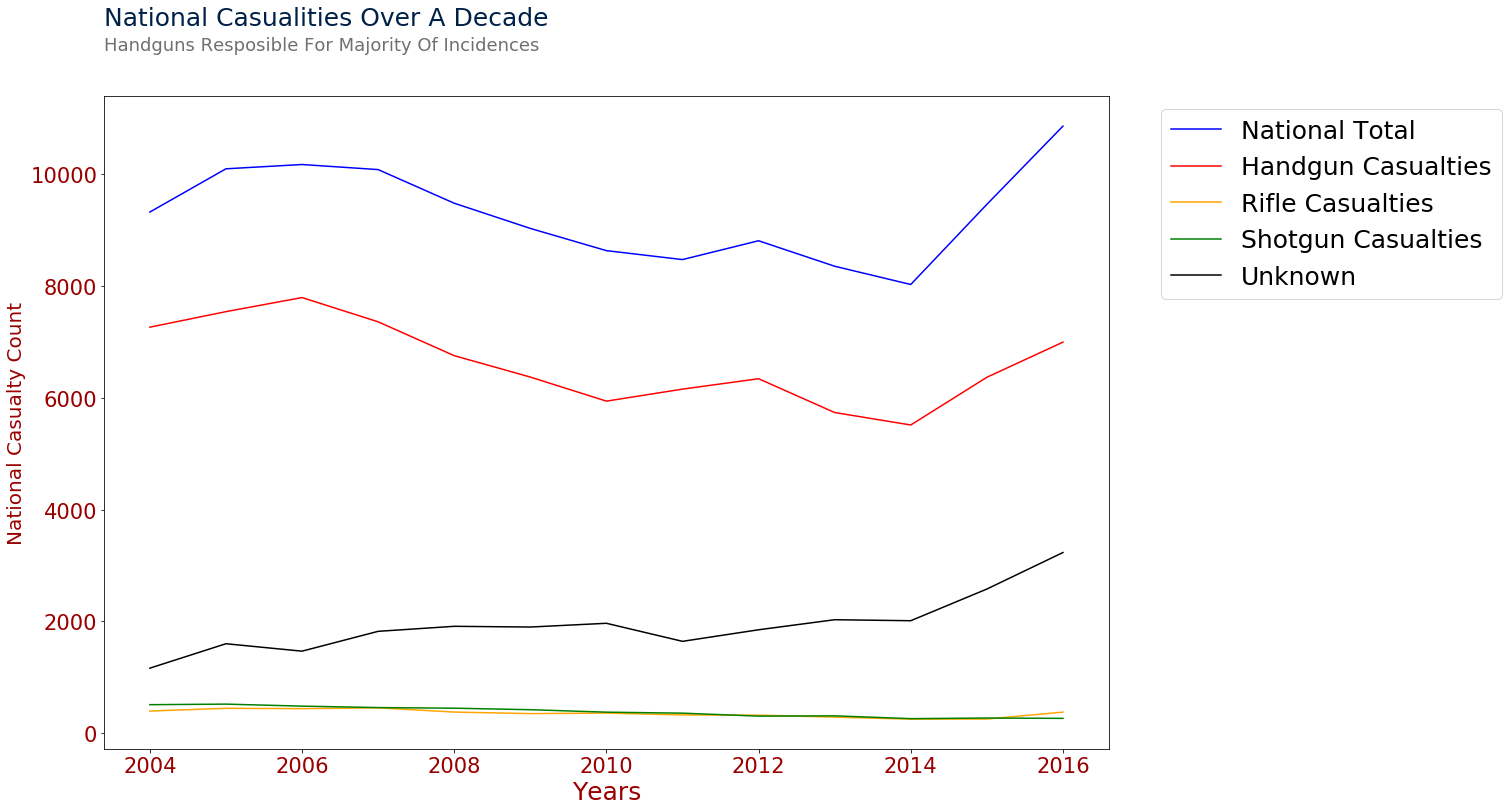

In [0]:
###National casualties line plot###

#data to plot 
plt.figure(figsize=(18,12))
plt.plot(national_only['Year'],national_only['Total'],c='blue',label='National Total',)
plt.plot(national_only['Year'],national_only['Handgun Casualties'],c='red', label='Handgun Casualties')
plt.plot(national_only['Year'],national_only['Rifle Casualties'],c='orange',label='Rifle Casualties')
plt.plot(national_only['Year'],national_only['Shotgun Casualties'],c='green',label='Shotgun Casualties')
plt.plot(national_only['Year'],national_only['Unkown casualties'],c='black',label = 'Unknown');
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",fontsize=25)

#labels
plt.xlabel('Years',fontsize=25,color='#9b0000')
plt.ylabel('National Casualty Count',fontsize=20,color='#9b0000')
plt.title('National Casualities Over A Decade',fontsize=25,loc='left',y=1.1,color='#002147')
plt.suptitle('Handguns Resposible For Majority Of Incidences ',fontsize=18,x=.295,y=.95,color='808080')
plt.xticks(size = 21,color='#9b0000')
plt.yticks(size = 21,color='#9b0000')
plt.show()



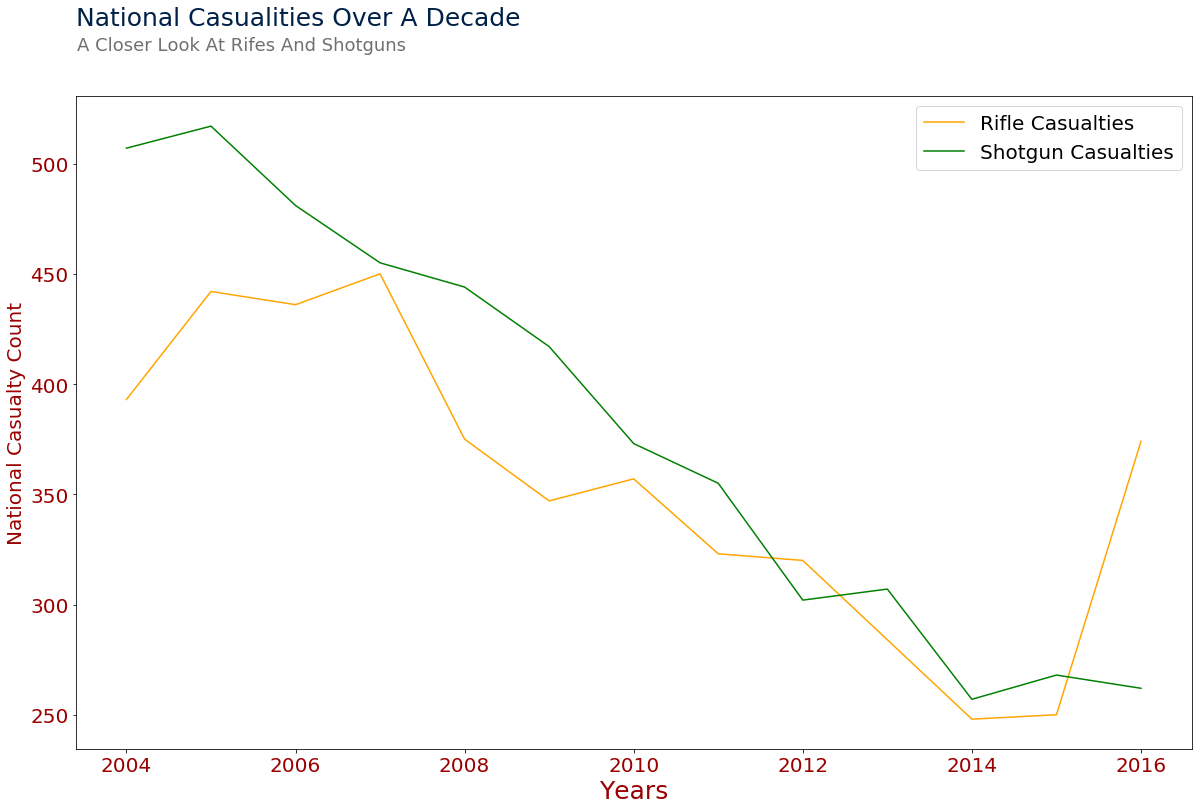

In [0]:
### Rifle and Shotgun closer look line plot ###

#data being ploted
plt.figure(figsize=(20,12))
plt.plot(national_only['Year'],national_only['Rifle Casualties'],c='orange',label='Rifle Casualties')
plt.plot(national_only['Year'],national_only['Shotgun Casualties'],c='green',label='Shotgun Casualties')

#labels
plt.xlabel('Years',fontsize=25,color='#9b0000')
plt.ylabel('National Casualty Count',fontsize=20,color='#9b0000')
plt.title('National Casualities Over A Decade',fontsize=25,loc='left',y=1.1,color='#002147')
plt.suptitle('A Closer Look At Rifes And Shotguns',fontsize=18,x=.24,y=.95,color='808080')
plt.legend(loc='best',fontsize = 20)
plt.xticks(size = 15,color='#9b0000',fontsize=20)
plt.yticks(size = 10,color='#9b0000',fontsize=20)
plt.show()

#second graph stacked bar

In [0]:
###make a 2016 only data set ###

#extract specific year we need form main data frame
twenty16 = Mainv3.loc[Mainv3["Year"]==2016]
#reset the index
twenty16 = twenty16.reset_index(drop=True)
#revise
twenty16.head()

,Year,State,Total,Handgun,Handgun Casualties,Rifle,Rifle Casualties,Shotgun,Shotgun Casualties,Unknown,Unknown Casualties
0,2016,Alaska,43,Handgun,12,Rifle,4,Shotgun,1,Unknown,26
1,2016,Arizona,227,Handgun,156,Rifle,16,Shotgun,10,Unknown,45
2,2016,Arkansas,151,Handgun,72,Rifle,11,Shotgun,3,Unknown,65
3,2016,California,1368,Handgun,930,Rifle,37,Shotgun,36,Unknown,365
4,2016,Colorado,136,Handgun,87,Rifle,4,Shotgun,4,Unknown,41


In [0]:
#need to abbreviate to make x axis less gumbled up in bar graph
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [0]:
#add the abbriviations column
twenty16['abbrev'] = twenty16['State'].map(us_state_abbrev)
twenty16.head()

,Year,State,Total,Handgun,Handgun Casualties,Rifle,Rifle Casualties,Shotgun,Shotgun Casualties,Unknown,Unknown Casualties,abbrev
0,2016,Alaska,43,Handgun,12,Rifle,4,Shotgun,1,Unknown,26,AK
1,2016,Arizona,227,Handgun,156,Rifle,16,Shotgun,10,Unknown,45,AZ
2,2016,Arkansas,151,Handgun,72,Rifle,11,Shotgun,3,Unknown,65,AR
3,2016,California,1368,Handgun,930,Rifle,37,Shotgun,36,Unknown,365,CA
4,2016,Colorado,136,Handgun,87,Rifle,4,Shotgun,4,Unknown,41,CO


In [0]:
#Turn firearm type into their own list of values, easier for plotting
states = twenty16.iloc[:,11]
handgun_bar = twenty16.iloc[:,4]
rifle_bar = twenty16.iloc[:,6]
shotgun_bar = twenty16.iloc[:,8]
unknown_bar = twenty16.iloc[:,10]
indx = states

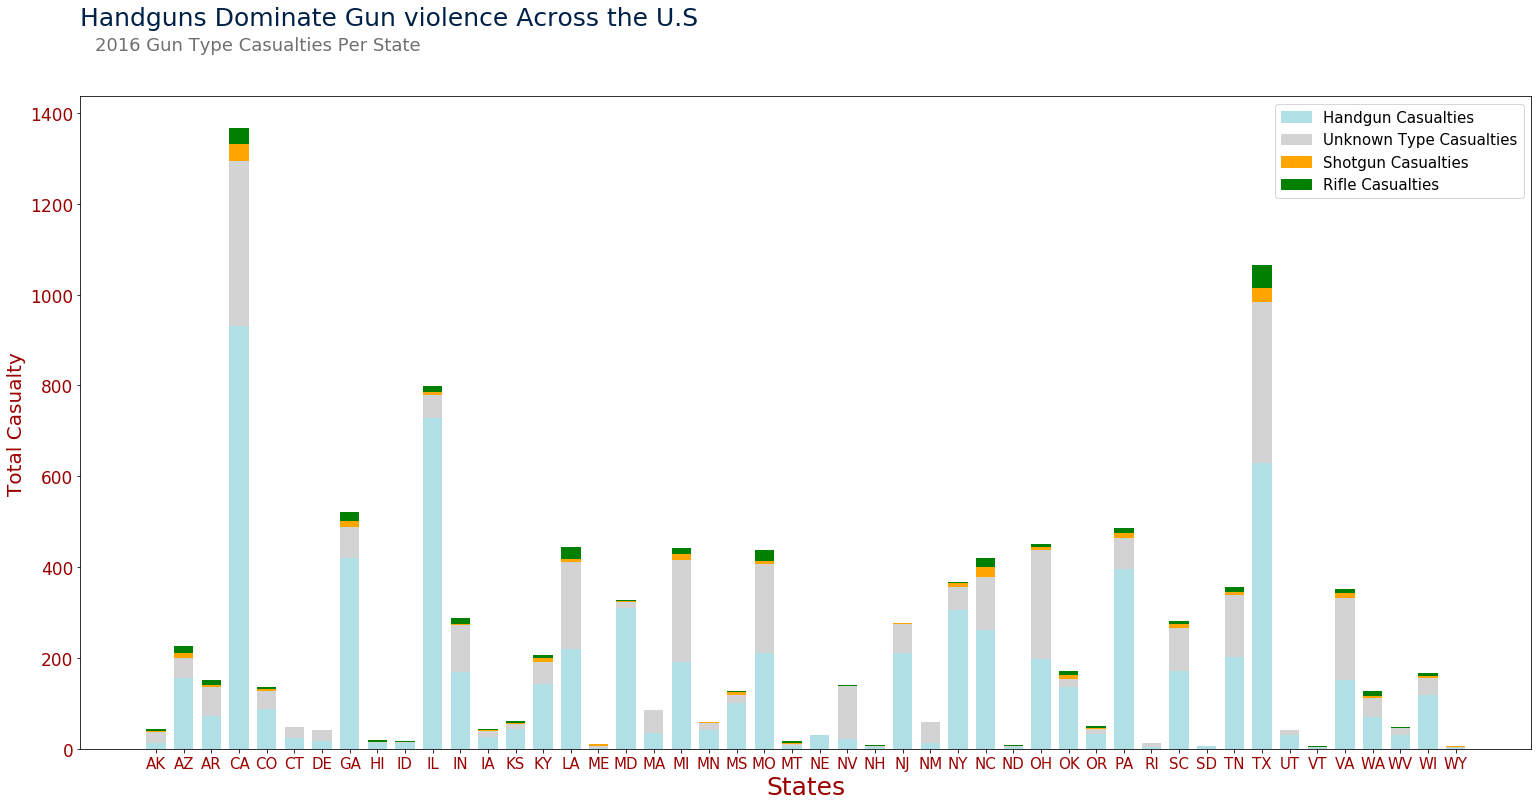

In [0]:
import matplotlib.patches as mpatches
#graphing data 
fig1 = plt.figure(figsize=(26,12))
barWidth = .7
graphhand = plt.bar(x=indx, height=handgun_bar, width=barWidth,color='#b0dfe5')
graphrifle = plt.bar(x=indx, height=unknown_bar, width=barWidth,color='lightgray', bottom=handgun_bar)
graphshotgun = plt.bar(x=indx, height=shotgun_bar, width=barWidth,color ='orange', bottom=handgun_bar+unknown_bar)
graphunknown = plt.bar(x=indx, height=rifle_bar, width=barWidth, color='green', bottom=handgun_bar+unknown_bar+shotgun_bar)

#legend 
H_patch = mpatches.Patch(color='#b0dfe5',label='Handgun Casualties')
U_patch = mpatches.Patch(color='lightgray',label='Unknown Type Casualties')
S_patch = mpatches.Patch(color='orange',label='Shotgun Casualties')
R_patch = mpatches.Patch(color='green',label='Rifle Casualties')
plt.legend(handles=[H_patch,U_patch,S_patch,R_patch],loc=0,fontsize=15)

#labels
plt.xlabel('States',fontsize=25,color='#9b0000')
plt.ylabel('Total Casualty',fontsize=20,color='#9b0000')
plt.title('Handguns Dominate Gun violence Across the U.S',fontsize=25,loc='left',y=1.1,color='#002147')
plt.suptitle('2016 Gun Type Casualties Per State',fontsize=18,x=.22,y=.95,color='808080')
plt.xticks(size = 15,color='#9b0000')
plt.yticks(size = 17,color='#9b0000')
plt.show()